In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\HPr\\XrayCNNClassifier\\research'

In [3]:
os.chdir('c:\\Users\\HPr\\XrayCNNClassifier\\research')

In [4]:
from collections import namedtuple
DataIngestionConfig = namedtuple("DataIngestionConfig", [
    "root_dir",
    "source_URL",
    "local_data_file",
    "unzip_dir"
])

In [5]:
pip install nibabel

     ---------------------------------------- 3.3/3.3 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
nii_file=r'C:\Users\HPr\XrayCNNClassifier\1-Flair.nii'
png_file= r''

In [7]:
import nibabel as nib
import matplotlib.pyplot as plt

def nii_to_png(nii_file, png_file):
    # Load the NIFTI image
    img = nib.load(nii_file)
    data = img.get_fdata()
    
    # Plot the image data
    plt.imshow(data[:, :, data.shape[-1] // 2], cmap='gray')
    
    # Save the plot as a PNG image
    plt.savefig(png_file)
    return png_file

# nii_to_png('input.nii', 'output.png')

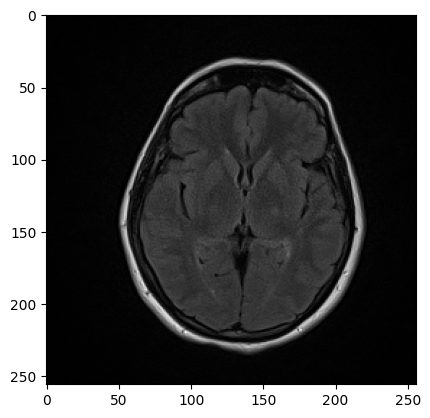

In [10]:
nii_to_png(nii_file,png_file)

In [3]:
import os
import shutil

def copy_nii_files(src_dir, dest_dir):

    src_dir = r"C:\Users\HPr\XrayCNNClassifier\logs\artifacts\data_ingestion\Brain MRI Dataset"
    dest_dir=r""
    for i in range(1, 61):
        patient_folder = "Patient-" + str(i)
        patient_folder_path = os.path.join(src_dir, patient_folder)
        
        for file_name in ["{}-Flair.nii".format(i), "{}-LesionSeg-Flair.nii".format(i), 
                         "{}-LesionSeg-T1.nii".format(i), "{}-LesionSeg-T2.nii".format(i), 
                         "{}-T1.nii".format(i), "{}-T2.nii".format(i)]:
            file_path = os.path.join(patient_folder_path, file_name)
            if os.path.exists(file_path):
                shutil.copy2(file_path, dest_dir)


In [1]:
import requests

In [2]:
content=requests.get('https://data.mendeley.com/datasets/8bctsm8jz7/1')

In [6]:
content.url

'https://data.mendeley.com/datasets/8bctsm8jz7/1'

In [ ]:
import os
os.getcwd()

: 

In [ ]:
os.chdir('c:\\Users\\HPr\\XrayCNNClassifier')

In [13]:
from collections import namedtuple
DataIngestionConfig = namedtuple("DataIngestionConfig", [
    "root_dir",
    "source_URL",
    "local_data_file",
    "unzip_dir"
])

In [14]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataIngestionConfig:
    root_dir: Path
    source_URL: str
    local_data_file: Path
    unzip_dir: Path

In [15]:
from XraydeepClassifier.constants import *
from XraydeepClassifier.utils.common import read_yaml, create_directories

In [17]:
class ConfigurationManager:
    def __init__(
        self, 
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        create_directories([self.config.artifacts_root])
    

    def get_data_ingestion_config(self) -> DataIngestionConfig:
        config = self.config.data_ingestion
        
        create_directories([config.root_dir])

        data_ingestion_config = DataIngestionConfig(
            root_dir=config.root_dir,
            source_URL=config.source_URL,
            local_data_file=config.local_data_file,
            unzip_dir=config.unzip_dir 
        )

        return data_ingestion_config

In [18]:
os.path.exists('configs/config.yaml')


True

In [20]:
import os
import urllib.request as request
from zipfile import ZipFile

class DataIngestion:
    def __init__(self, config: DataIngestionConfig):
        self.config = config

    def download_file(self):
        if not os.path.exists(self.config.local_data_file):
            filename, headers = request.urlretrieve(
                url = self.config.source_URL,
                filename = self.config.local_data_file
            )

    def _get_updated_list_of_files(self, list_of_files):
        return [f for f in list_of_files if f.endswith(".nii")]

    def _preprocess(self, zf: ZipFile, f: str, working_dir: str):
        target_filepath = os.path.join(working_dir, f)
        if not os.path.exists(target_filepath):
            zf.extract(f, working_dir)
        
        if os.path.getsize(target_filepath) == 0:
            os.remove(target_filepath)

    def unzip_and_clean(self):
        with ZipFile(file=self.config.local_data_file, mode="r") as zf:
            list_of_files = zf.namelist()
            updated_list_of_files = self._get_updated_list_of_files(list_of_files)
            for f in updated_list_of_files:
                self._preprocess(zf, f, self.config.unzip_dir)

In [21]:
try:
    config = ConfigurationManager()
    data_ingestion_config = config.get_data_ingestion_config()
    data_ingestion = DataIngestion(config=data_ingestion_config)
    data_ingestion.download_file()
    data_ingestion.unzip_and_clean()
except Exception as e:
    raise e

HTTPError: HTTP Error 403: Forbidden

In [1]:
import numpy as np
import pandas as pd 
filenames = os.listdir("C:\\Users\\HPr\\XrayCNNClassifier\\logs\\artifacts\\data_ingestion\\Brain MRI Dataset")
categories = []
for filename in filenames:
    category = filename.split('.')
    if category == '-Flair.nii':
        categories.append(1)
        
    elif category == '-LesionSeg-Flair.nii':
        categories.append(2)
    elif category == ':-LesionSeg-T1.nii':
        categories.append(3)
    elif category == '-LesionSeg-T2.nii':
        categories.append(4)
    elif category == '-T1.nii':
        categories.append(5)        
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [8]:
df

,filename,category


In [ ]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\HPr\\XrayCNNClassifier\\logs\\artifacts\\data_ingestion\\Brain MRI Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
src_dir=r"C:\Users\HPr\XrayCNNClassifier\logs\artifacts\data_ingestion\Brain MRI Dataset"
dest_dir=r"C:\Users\HPr\XrayCNNClassifier\logs\artifacts\data_ingestion\Brain Data"

In [3]:
import os
import shutil
def copy_nii_files(src_dir, dest_dir):
    for i in range(1, 61):
        patient_folder = "Patient-" + str(i)
        patient_folder_path = os.path.join(src_dir, patient_folder)
        
        for file_name in ["{}-Flair.nii".format(i), "{}-LesionSeg-Flair.nii".format(i), 
                         "{}-LesionSeg-T1.nii".format(i), "{}-LesionSeg-T2.nii".format(i), 
                         "{}-T1.nii".format(i), "{}-T2.nii".format(i)]:
            file_path = os.path.join(patient_folder_path, file_name)
            if os.path.exists(file_path):
                shutil.copy2(file_path, dest_dir)

In [5]:
copy_nii_files(src_dir, dest_dir)

In [ ]:
nii_file=r"C:\Users\HPr\XrayCNNClassifier\logs\artifacts\data_ingestion\Brain Data"
png_file=r""

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

def nii_to_png(nii_file, png_file):
    # Load the NIFTI image
    img = nib.load(nii_file)
    data = img.get_fdata()
    
    # Plot the image data
    plt.imshow(data[:, :, data.shape[-1] // 2], cmap='gray')
    
    # Save the plot as a PNG image
    plt.savefig(png_file)
    return png_file

# nii_to_png('input.nii', 'output.png')

In [ ]:
nii_to_png(nii_file,png_file)

In [6]:
# Convert all nii to png

import nibabel as nib
import matplotlib.pyplot as plt
import os

def nii_to_png(nii_file, png_file):
    # Load NIfTI file
    img = nib.load(nii_file)
    # Get image data
    img_data = img.get_fdata()
    # Plot the image data
    plt.imshow(img_data[:, :, img_data.shape[-1]//2], cmap='gray')
    plt.axis('off')
    # Save the plot as a PNG file
    plt.savefig(png_file, bbox_inches='tight', pad_inches=0, dpi=100)
    plt.close()

def convert_all_niis(directory):
    # Get list of all NIfTI files in the directory
    niis = [f for f in os.listdir(directory) if f.endswith('.nii')]
    # Loop through all NIfTI files and convert them to PNG
    for nii in niis:
        nii_path = os.path.join(directory, nii)
        png_path = os.path.join(directory, nii.replace('.nii', '.png'))
        nii_to_png(nii_path, png_path)






In [8]:
convert_all_niis('C:\\Users\\HPr\\XrayCNNClassifier\\logs\\artifacts\\data_ingestion\\Brain Data')

In [9]:
import os

def remove_niis(directory):
    # Get list of all NIfTI files in the directory
    niis = [f for f in os.listdir(directory) if f.endswith('.nii')]
    # Loop through all NIfTI files and remove them
    for nii in niis:
        nii_path = os.path.join(directory, nii)
        os.remove(nii_path)

In [10]:
remove_niis('C:\\Users\\HPr\\XrayCNNClassifier\\logs\\artifacts\\data_ingestion\\Brain Data')

In [ ]:
import os
import shutil

def divide_pngs(directory):
    # Define the names of the 6 files
    file_names = ['-Flair.png', '-LesionSeg-Flair.png', '-LesionSeg-T1.png', '-LesionSeg-T2.png', '-T1.png', '-T2.png']
    # Loop through all the files in the directory
    for file in os.listdir(directory):
        if file.endswith('.png'):
            # Get the name of the file without the numbers at the beginning
            name_without_numbers = file
            while name_without_numbers[0].isdigit():
                name_without_numbers = name_without_numbers[1:]
            # Check if the name without numbers is in the list of the 6 files
            if name_without_numbers in file_names:
                file_path = os.path.join(directory, file)
                folder_path = os.path.join(directory, name_without_numbers.split('.')[0])
                os.makedirs(folder_path, exist_ok=True)
                shutil.move(file_path, folder_path)



In [ ]:
divide_pngs('C:\\Users\\HPr\\XrayCNNClassifier\\logs\\artifacts\\data_ingestion\\Brain Data')